<a href="https://colab.research.google.com/github/simongiando/DeepLearning/blob/main/Fundamentals/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model



## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.11.0


## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

## Creating some data to view and fit 

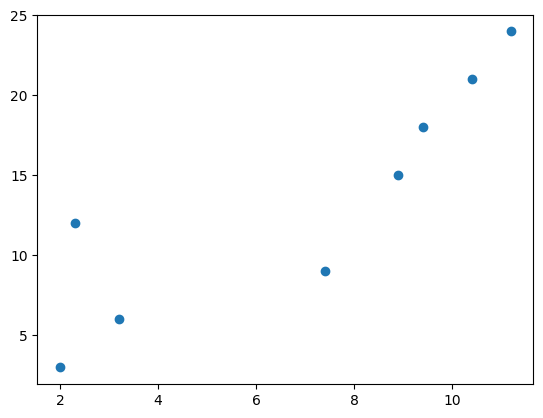

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([2.0,3.2,7.4,2.3,8.9,9.4,10.4,11.2])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

Before we do any modelling, can you calculate the pattern between `X` and `y`?

For example, say I asked you, based on this data what the `y` value would be if `X` was 17.0?

Or how about if `X` was -10.0?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom',"bedroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bedroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(2.0, 3.0)

In [6]:
X[1],y[1]

(3.2, 6.0)

In [9]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

# these are both scalars (no shape)
input_shape,output_shape

((), ())

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [10]:
# Let's take a look at the single examples invidually
X[0], y[0]

(2.0, 3.0)

In [11]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 2. ,  3.2,  7.4,  2.3,  8.9,  9.4, 10.4, 11.2])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
input_shape = X[0].shape
out_shape = y[0].shape
input_shape,out_shape

(TensorShape([]), TensorShape([]))

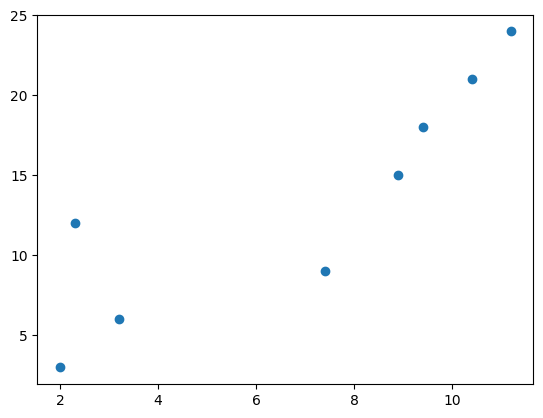

In [13]:
plt.scatter(X,y)

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `3.0`.

So now we get our answer, we're trying to use 1 `X` value to predict 1 `y` value.

You might be thinking, "this seems pretty complicated for just predicting a straight line...".

And you'd be right.

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental. 

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: **making sure your input and outputs are in the correct shape**.

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`. 

In [17]:
print(X.shape)

(8,)


In [18]:
# Expanded dimension
print(tf.expand_dims(X,axis=-1).shape)

(8, 1)


In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) ## the X is expanded

Epoch 1/5
1/1 [==============================] - 1s 575ms/step - loss: 16.2539 - mae: 16.2539
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 15.7747 - mae: 15.7747
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 15.2954 - mae: 15.2954
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 14.8162 - mae: 14.8162
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 14.3370 - mae: 14.3370


In [22]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 2. ,  3.2,  7.4,  2.3,  8.9,  9.4, 10.4, 11.2])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
# Try and make a prediction using our model
y_pred = model.predict([17.2])
y_pred

1/1 [==============================] - 0s 75ms/step


array([[-0.9738806]], dtype=float32)

In [23]:
y_pred +15

array([[14.026119]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [28]:
# Rebuild the model
# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3.8426 - mae: 3.8426
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 3.6046 - mae: 3.6046
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 3.3996 - mae: 3.3996
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 3.1946 - mae: 3.1946
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 2.9896 - mae: 2.9896
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 2.8495 - mae: 2.8495
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 2.7971 - mae: 2.7971
Epoch 8/100
1/1 [==============================] - 0s 45ms/step - loss: 2.7448 - mae: 2.7448
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 2.6924 - mae: 2.6924
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 2.6400 - mae: 2.6400
Epoch 11/100
1/1 [==============================] - 0s 31ms/step - loss

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher). 

What do you think this means for when we make a prediction with our model?

How about we try predict on 17.0 again?

In [29]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 2. ,  3.2,  7.4,  2.3,  8.9,  9.4, 10.4, 11.2])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [30]:
# Let's see if our model's prediction has imporved
model.predict([15])

1/1 [==============================] - 0s 128ms/step


array([[28.760931]], dtype=float32)

In [34]:
# Test 1
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 883ms/step - loss: 14.9690 - mae: 14.9690
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 14.9506 - mae: 14.9506
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.9322 - mae: 14.9322
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.9138 - mae: 14.9138
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.8954 - mae: 14.8954
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.8770 - mae: 14.8770
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 14.8586 - mae: 14.8586
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 14.8402 - mae: 14.8402
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.8218 - mae: 14.8218
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 14.8034 - mae: 14.8034
Epoch 11/100
1/1 [==============================

In [37]:
# Test 2
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compilse the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 975ms/step - loss: 12.9455 - mae: 12.9455
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9402 - mae: 12.9402
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9350 - mae: 12.9350
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9297 - mae: 12.9297
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9244 - mae: 12.9244
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 12.9192 - mae: 12.9192
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9139 - mae: 12.9139
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9087 - mae: 12.9087
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9034 - mae: 12.9034
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8981 - mae: 12.8981
Epoch 11/100
1/1 [==============================

In [40]:
# Test 3
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compilse the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 552ms/step - loss: 15.8666 - mae: 15.8666
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.5858 - mae: 14.5858
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 13.3137 - mae: 13.3137
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0483 - mae: 12.0483
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.7873 - mae: 10.7873
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5285 - mae: 9.5285
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2688 - mae: 8.2688
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0037 - mae: 7.0037
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 5.7276 - mae: 5.7276
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 4.6820 - mae: 4.6820
Epoch 11/100
1/1 [==============================] - 0s 11m

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [41]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>